# Basic Feature Engineering with Time Series Data

**Aim**:

The goal of feature engineering is to provide strong and ideally simple relationships between new
input features and the output feature for the supervised learning algorithm to model. In effect, the
best default strategy is to use all the knowledge available to create many good datasets from your
time series dataset and use model performance to determine what good features and good views
of your problem happen to be. And also, the rationale and goals of feature engineering time series
data is to

- Discover how to perform feature engineering on time series data with Python to model your 
time series problem with machine learning algorithms.
- How to develop basic date-time based input features.
  - Date Time Features: these are components of the time step itself for each observation.
- How to develop more sophisticated lag and sliding window summary statistics features?
  - Lag Features: these are values at prior time steps.
  - Window Features: these are a summary of values over a fixed window of prior time
steps.

**Three classes of features:** <br>

1. Date Time Features <br>
2. Lag Features <br>
3. Window Features <br>
  - Rolling window <br>
  - Expanding Window <br>

Dataset: "daily-min-temperatures". <br>
Dataset link: <https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv>.

In [2]:
# Importing required packages
import matplotlib.pyplot as plt
import pandas as pd

from datetime import datetime

 a.) Feature Engineering for Time Series

A time series dataset must be transformed to be modeled as a supervised learning problem.

```txt
This is something that looks like:| To something that looks like:
1 time 1, value 1 |  1 input 1, output 1
2 time 2, value 2 |  2 input 2, output 2
3 time 3, value 3 | 3 input 3, output 3
```

In [25]:
df = pd.read_csv("daily-min-temperatures.csv", index_col=0) # Reading the dataset

In [4]:
df.head() # View the first 5 rows

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [6]:
df.shape # Viewing no. of rows and columns

(3650, 1)

In [8]:
df.describe() # Summary statistics

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [10]:
df.isnull().sum() # Checking datatypes

Temp    0
dtype: int64

# Plotting the data

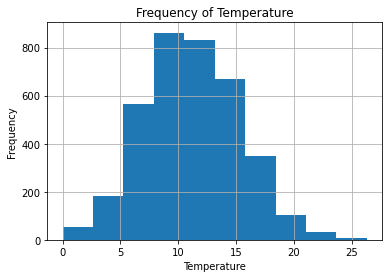

In [11]:
df.hist() # Plot a histogram
plt.title("Frequency of Temperature") # Set title

# Set labels
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

 b.) Date Time Features

The simplest features are features from the date/time of each observation. Two features that we
can start with are the integer month and day for each observation. Use these inputs to help tease
out time-of-year or time-of-month type seasonality information.

In [14]:
format = "%Y-%m-%d" # Set date format

# Initialize empty arrays
day = []
month = []
year = []
weekday = []
weekday_dict = {}

for d in df.index:
    x = datetime.strptime(d, format)
    day.append(x.day)
    month.append(x.month)
    year.append(x.year)
    weekday.append(x.weekday())
    if x.weekday() not in weekday_dict:
        weekday_dict[x.weekday()] = x.strftime("%A") 

# Set columns as seperate variables
df["Day"] = day
df["Month"] = month
df["Year"] = year
df["Weekday"] = weekday

In [20]:
df.head() # Viewing first 5 records

,Temp,Day,Month,Year,Weekday
Date,,,,,
1981-01-01,20.7,1,1,1981,3
1981-01-02,17.9,2,1,1981,4
1981-01-03,18.8,3,1,1981,5
1981-01-04,14.6,4,1,1981,6
1981-01-05,15.8,5,1,1981,0


In [44]:
weekday_dict # Viewing dictionary object

{3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday',
 0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday'}

In [2]:
# Querying historical data over time
from datetime import datetime, timedelta
data = [
    {"timestamp": datetime(1981, 1, 1), "value": 100},
    {"timestamp": datetime(1981, 1, 2), "value": 200},
    {"timestamp": datetime(1981, 1, 3), "value": 300},
    # ...
]

def query_historical_data(start_time, end_time, data):
    return [item for item in data if start_time <= item["timestamp"] <= end_time]

start_time = datetime(1981, 1, 1)
end_time = datetime(1981, 1, 2)

filtered_data = query_historical_data(start_time, end_time, data)
for item in filtered_data:
    print(item)

{'timestamp': datetime.datetime(1981, 1, 1, 0, 0), 'value': 100}
{'timestamp': datetime.datetime(1981, 1, 2, 0, 0), 'value': 200}


 c.) Lag Features

Lag features are the classical way that time series forecasting problems are transformed into
supervised learning problems. The supervised learning problem with shifted values looks as
follows: 

1. Value(t-1), Value(t+1)
2. Value(t-1), Value(t+1)
3. Value(t-1), Value(t+1)

In [26]:
# Creating a new DataFrame to avoid conflicts with existing one

series = pd.read_csv("daily-min-temperatures.csv", header=0, index_col=0) # Read dataset

In [27]:
series.head() # View 5 records

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


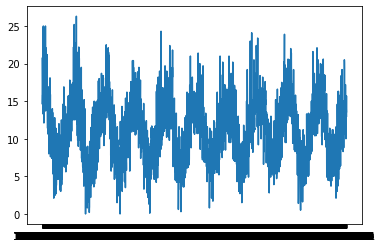

In [39]:
plt.plot(series)

In [28]:
temps = pd.DataFrame(series.values)
temps.head()

,0
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8


In [32]:
dataframe = pd.concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1)
dataframe.columns = ['t-3', 't-2', 't-1', 't+1']
print(dataframe.head)

<bound method NDFrame.head of        t-3   t-2   t-1   t+1
0      NaN   NaN   NaN  20.7
1      NaN   NaN  20.7  17.9
2      NaN  20.7  17.9  18.8
3     20.7  17.9  18.8  14.6
4     17.9  18.8  14.6  15.8
...    ...   ...   ...   ...
3645  10.0  12.9  14.6  14.0
3646  12.9  14.6  14.0  13.6
3647  14.6  14.0  13.6  13.5
3648  14.0  13.6  13.5  15.7
3649  13.6  13.5  15.7  13.0

[3650 rows x 4 columns]>


In [33]:
dataframe = pd.concat([temps.shift(1), temps], axis=1)
dataframe.columns = ['t-1', 't+1']
dataframe.head()

,t-1,t+1
0,NaN,20.7
1,20.7,17.9
2,17.9,18.8
3,18.8,14.6
4,14.6,15.8


 d.) Rolling Window Statistics

- Add a summary of the values at previous time steps.
- Calculate summary statistics across the values in the sliding window and include these as
features in our dataset.
  - First, shift the series
  - Create the rolling dataset
  - Calculate the mean values on each window of two values.
  - Construct the new dataset with just our new columns using concat() function

In [36]:
series = pd.read_csv("Daily-min-temperatures.csv", header=0, index_col=0) # Reread dataset
temps = pd.DataFrame(series.values)
shifted = temps.shift(1) # Shift series
window = shifted.rolling(window=3)
means = window.mean() # Calculating mean

dataframe = pd.concat([means, temps], axis=1) # Construct new dataset
dataframe.columns = ['mean(t-2,t-1)', 't+1']
dataframe.head() # Display 5 records

,"mean(t-2,t-1)",t+1
0,NaN,20.7
1,NaN,17.9
2,NaN,18.8
3,19.133333,14.6
4,17.100000,15.8


e.) **Expanding Window Statistics**

An expanding window can help with keeping track of the bounds of observable data. Like
the rolling() function on DataFrame, Pandas provides an expanding() function that collects sets of
all prior values for each time step. These lists of prior numbers can be summarized and included
as new features. Shift the series one-time step to ensure that the output value we wish to predict is
excluded from these window values. The statistical calculations exclude the NaN values in the
expanding window, meaning no further modification is required.

----

*__Notes__*

The values of first 5 windows are: <br>

1. NaN
2. NaN,NaN
3. NaN,NaN,20.7
4. NaN,20.7,17.9
5. 20.7,17.9,18.8 <br><br>

Thereforce, only the 5th window has usable data.

In [37]:
series = pd.read_csv('Daily-min-temperatures.csv', header=0, index_col=0) # Read dataset
temps = pd.DataFrame(series.values)

window = temps.expanding() # Expanding window
dataframe = pd.concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1) # Finding statistics
dataframe.columns = ['min', 'mean', 'max', 't+1'] #Specify columns to show
print(dataframe.head(5))

    min       mean   max   t+1
0  20.7  20.700000  20.7  17.9
1  17.9  19.300000  20.7  18.8
2  17.9  19.133333  20.7  14.6
3  14.6  18.000000  20.7  15.8
4  14.6  17.560000  20.7  15.8
